In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
country_data = pd.read_csv('Country-data.csv')

In [55]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [56]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [57]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [58]:
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [59]:
country_data.columns #sprawdzamy czy wysepuje leading space w nazwach kolumn

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

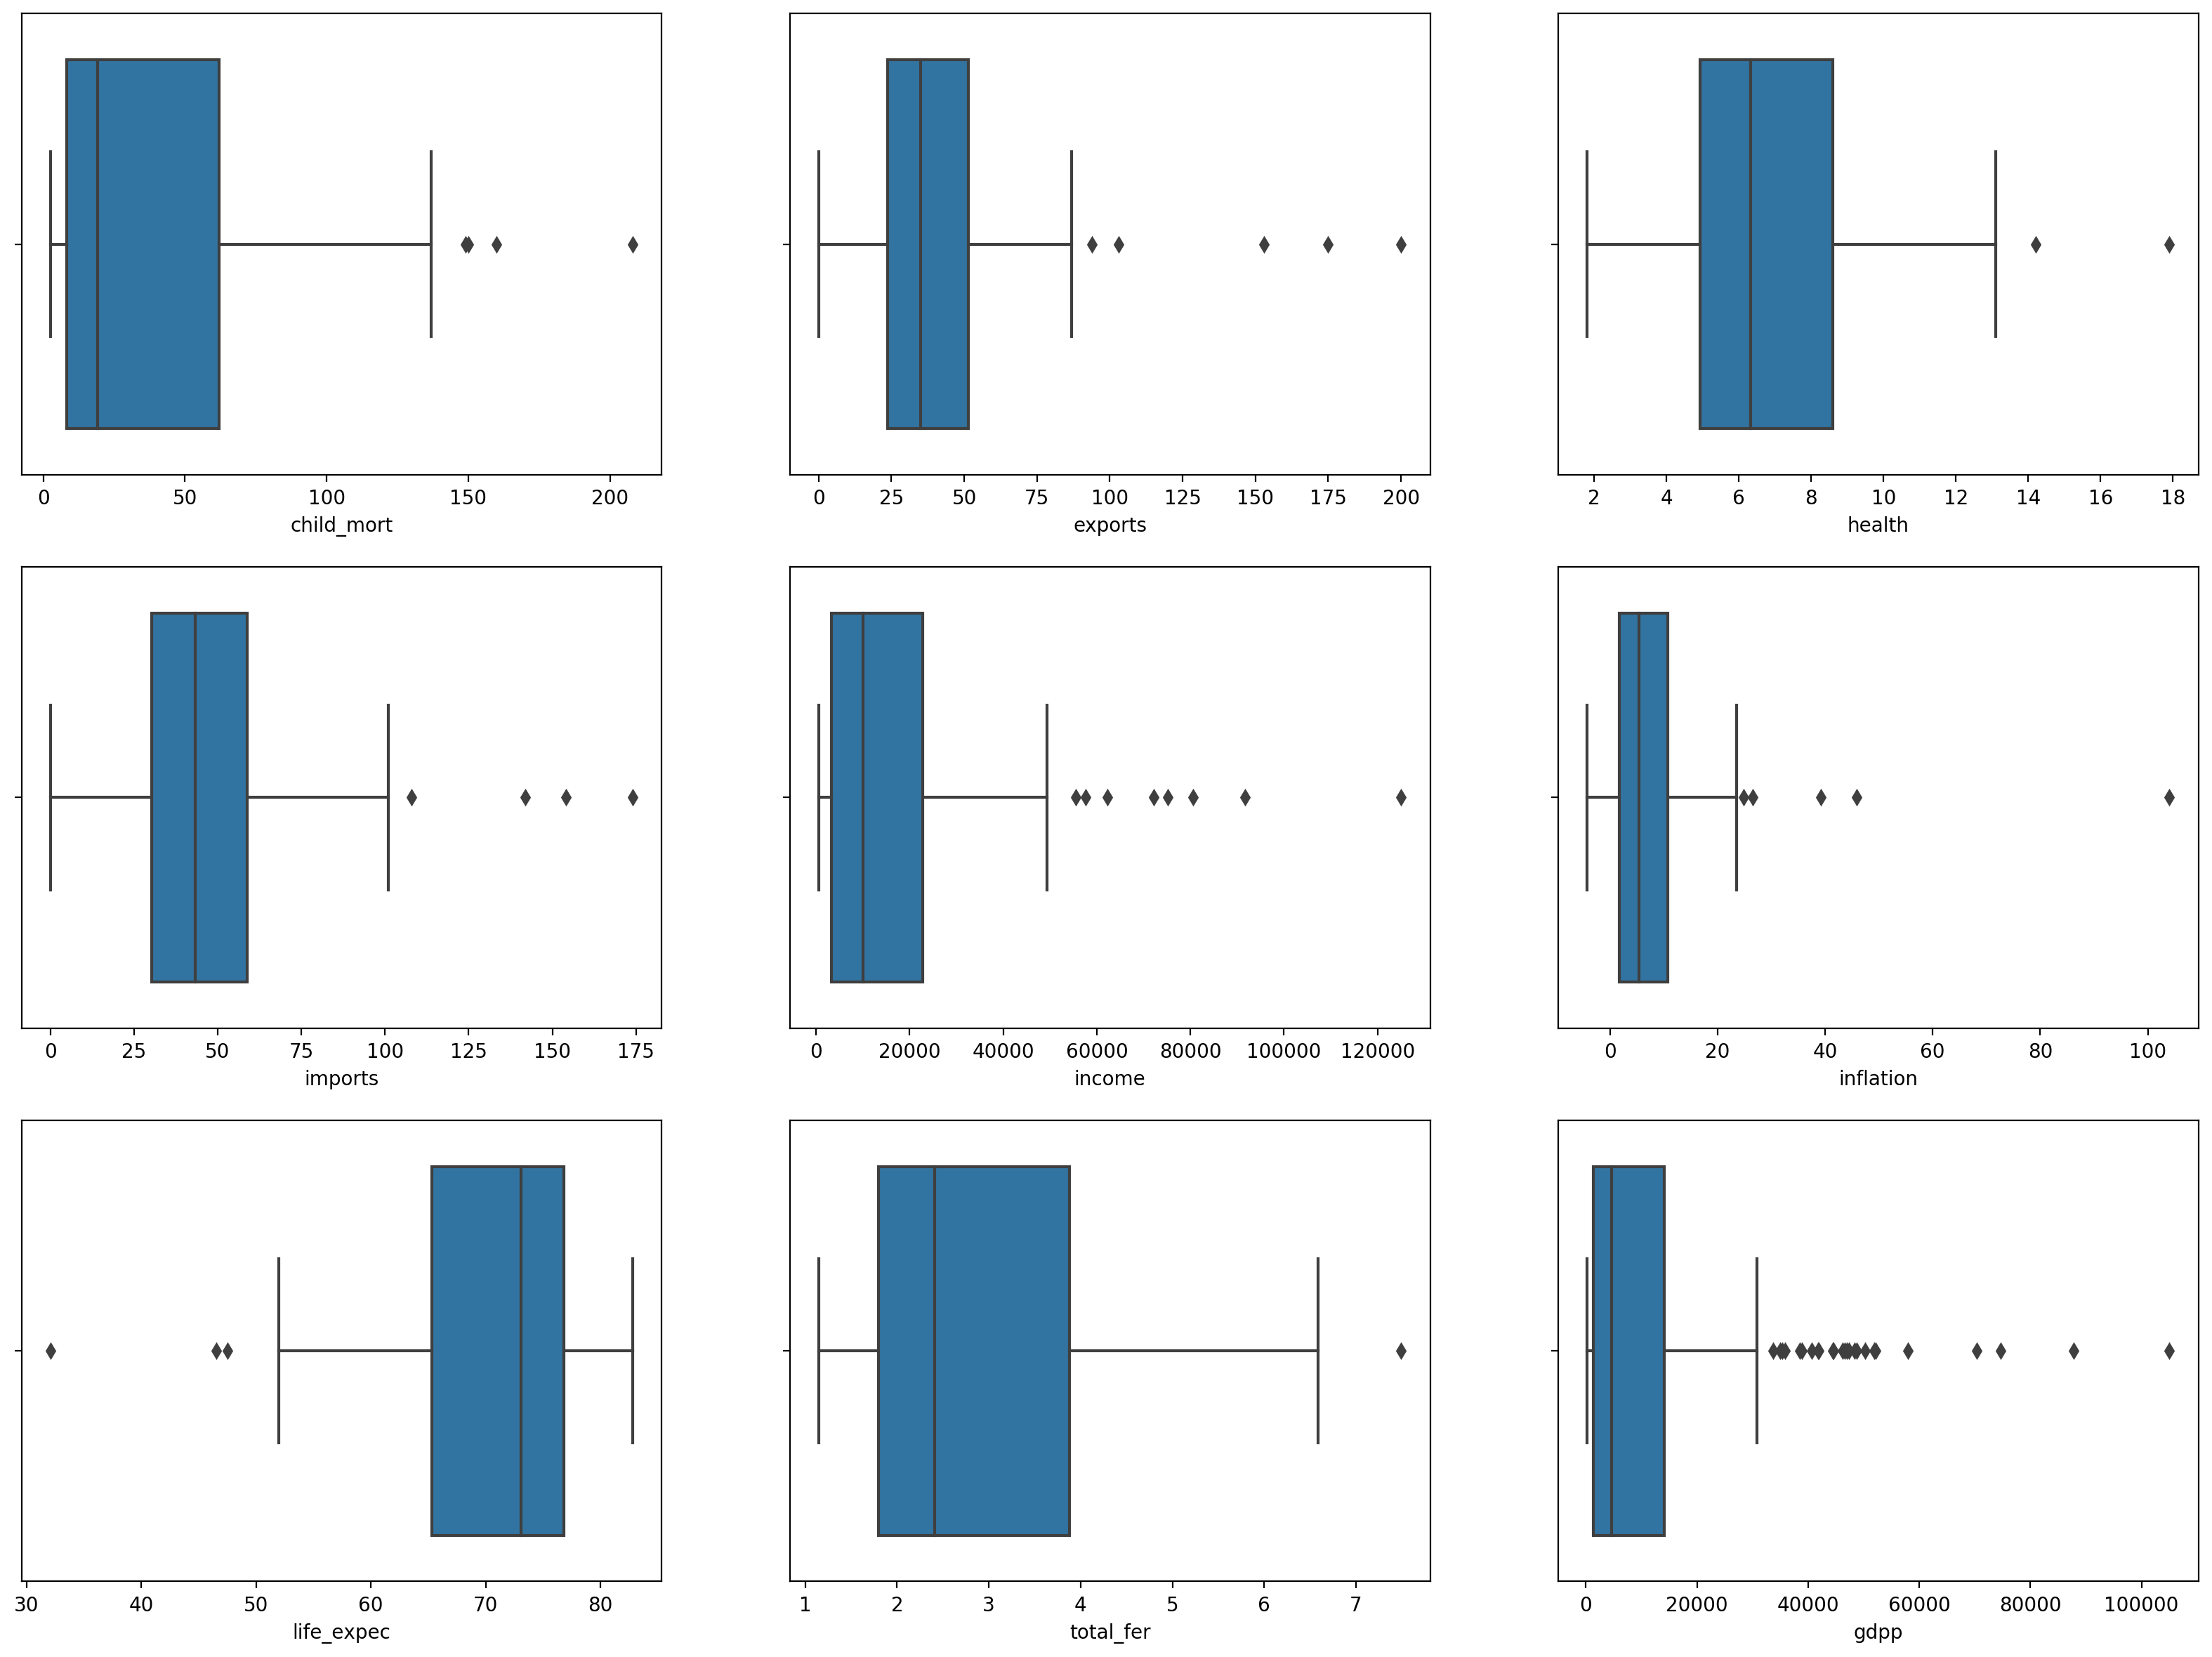

In [60]:
# sprawdzamy outliersy

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

In [61]:
from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze')
print("\n")
print(np.where(z > 3))

[[1.29153238 1.13827979 0.27908825 ... 1.61909203 1.90288227 0.67917961]
 [0.5389489  0.47965843 0.09701618 ... 0.64786643 0.85997281 0.48562324]
 [0.27283273 0.09912164 0.96607302 ... 0.67042323 0.0384044  0.46537561]
 ...
 [0.37231541 1.13030491 0.0088773  ... 0.28695762 0.66120626 0.63775406]
 [0.44841668 0.40647827 0.59727159 ... 0.34463279 1.14094382 0.63775406]
 [1.11495062 0.15034774 0.33801514 ... 2.09278484 1.6246091  0.62954556]]


*******************************************************************************


Ponizej sa punkty odstajace - nr indeksow i odpowiadające im indeksy kolumn w drugim wektorze


(array([ 23,  66,  66,  82,  91,  91,  91,  91,  98,  98, 112, 113, 114,
       123, 123, 132, 133, 133, 145, 159, 163], dtype=int64), array([4, 0, 6, 4, 1, 3, 4, 8, 1, 3, 7, 5, 8, 4, 8, 0, 1, 3, 8, 2, 5],
      dtype=int64))


In [62]:
country_data.shape

(167, 10)

In [63]:
country_data_outliers_removed = country_data[(z<3).all(axis=1)]

In [64]:
country_data_outliers_removed.shape

(153, 10)

In [65]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [68]:
X = country_data_outliers_removed.drop('country',axis =1)  
y = country_data_outliers_removed['country']

In [69]:
X.shape

(153, 9)

In [70]:
y.shape

(153,)

In [71]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [72]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [73]:
## PCA
## wykonanie standaryzacji przed zastosowaniem PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_scaled[:5,:5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [75]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [76]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [77]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


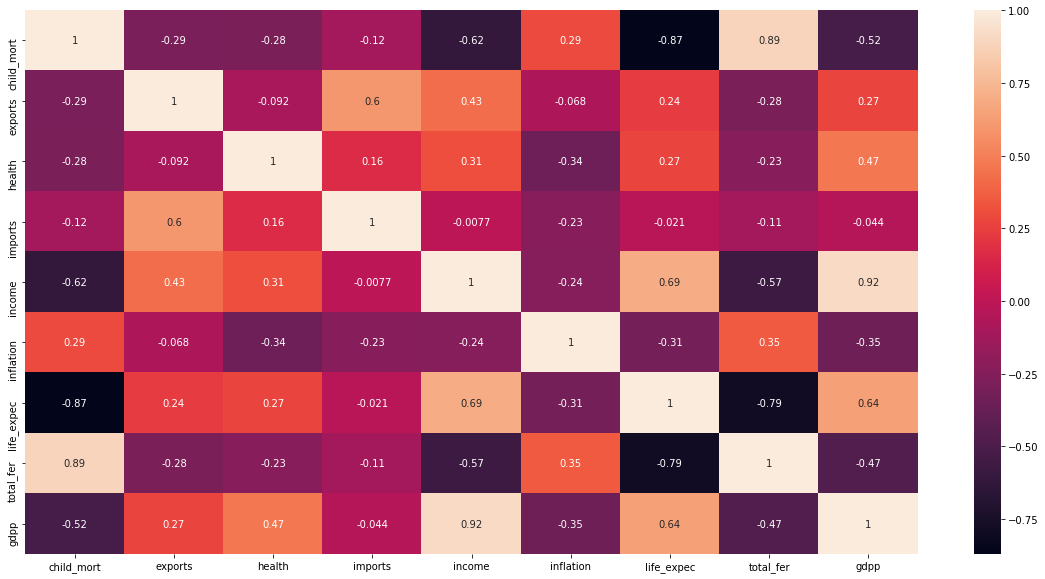

In [78]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [79]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [80]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [81]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [82]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

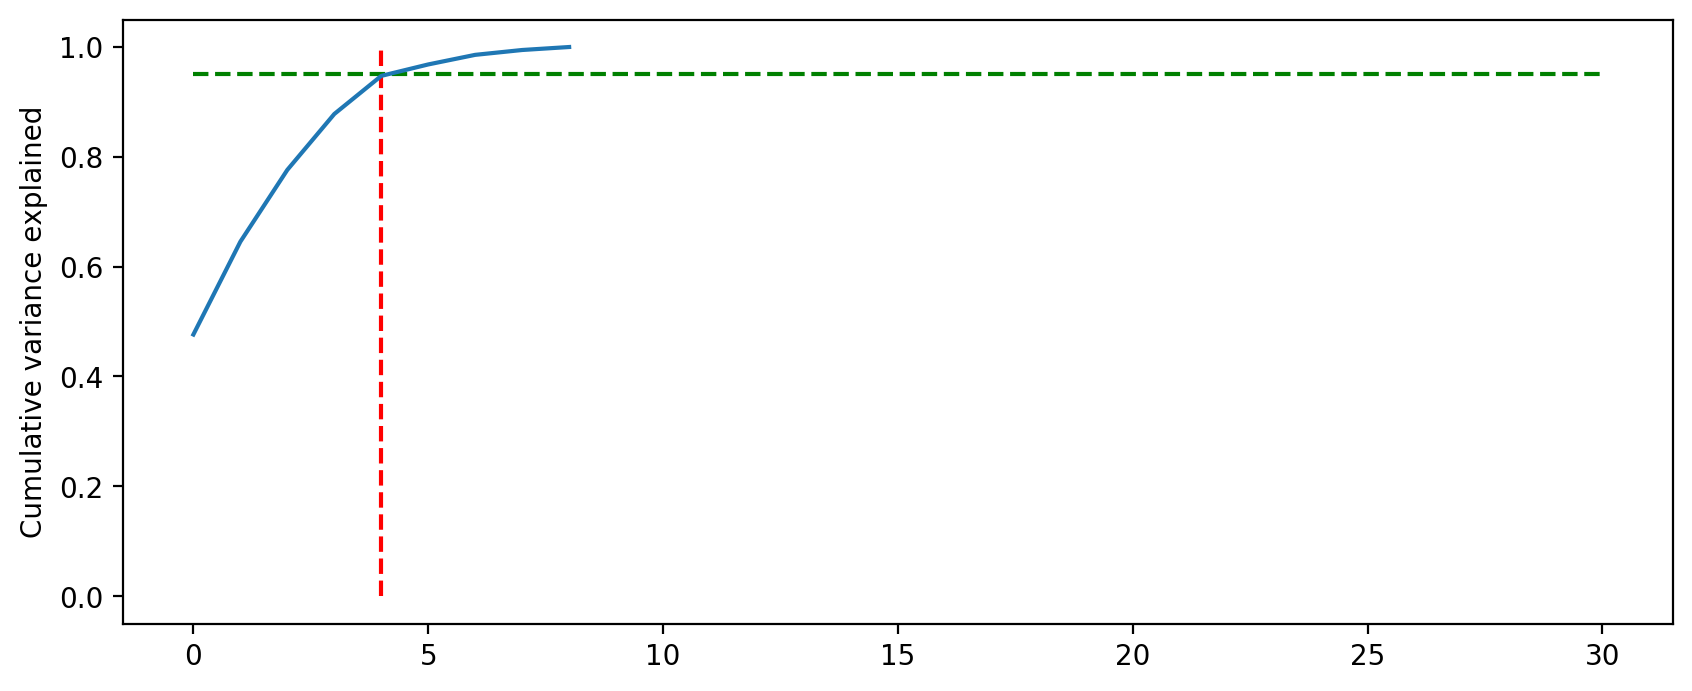

In [85]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [86]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)
X_pca_final = pca_final.fit_transform(X_scaled)

In [87]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 4)


In [88]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [89]:
corrmat.shape

(4, 4)

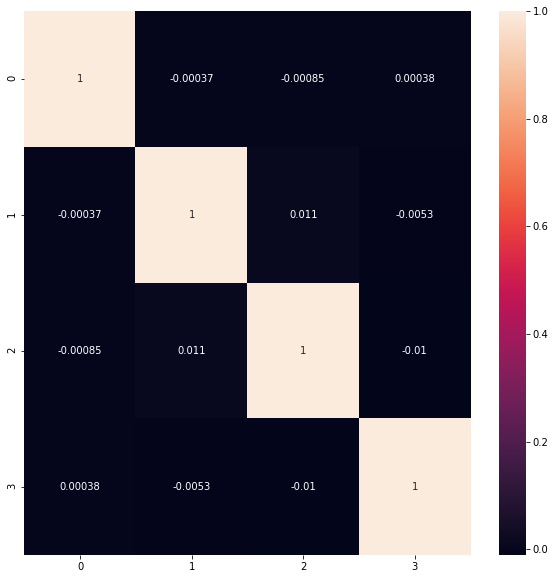

In [90]:
plt.figure(figsize=[10,10])
sns.heatmap(corrmat, annot=True)

In [91]:
colnames = list(X.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pca_df.head()

,PC1,PC2,Feature
0,-0.423220,0.034591,child_mort
1,0.203604,0.632770,exports
2,0.217542,-0.129340,health
3,0.082910,0.725759,imports
4,0.413693,-0.070674,income


In [92]:
pca_df

,PC1,PC2,Feature
0,-0.423220,0.034591,child_mort
1,0.203604,0.632770,exports
2,0.217542,-0.129340,health
3,0.082910,0.725759,imports
4,0.413693,-0.070674,income
5,-0.226510,-0.063171,inflation
6,0.427154,-0.143879,life_expec
7,-0.405505,0.018530,total_fer
8,0.394826,-0.157866,gdpp


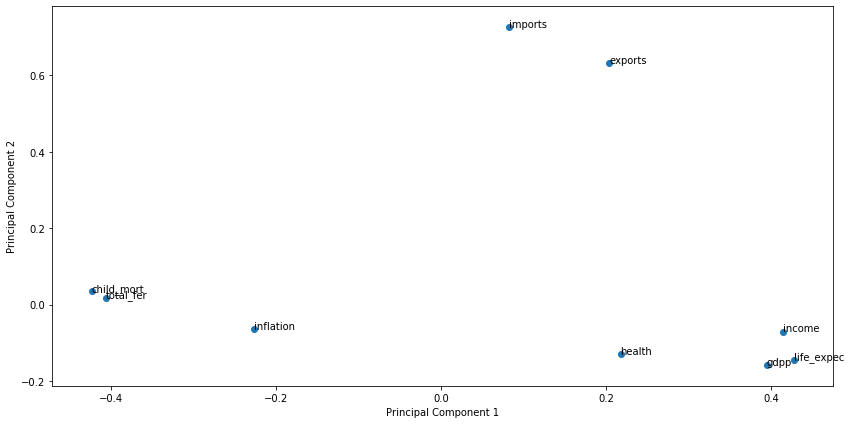

In [93]:
fig = plt.figure(figsize = (12,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

In [94]:
## Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [95]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [96]:
kmeans.labels_

array([1, 2, 4, 1, 2, 4, 4, 0, 0, 4, 0, 3, 4, 2, 2, 3, 2, 1, 2, 4, 2, 2,
       4, 2, 1, 1, 2, 1, 0, 2, 1, 1, 4, 4, 4, 1, 1, 1, 2, 1, 2, 3, 3, 0,
       4, 4, 4, 2, 1, 1, 3, 2, 0, 0, 4, 1, 2, 0, 1, 0, 2, 4, 1, 1, 2, 3,
       0, 4, 4, 4, 4, 3, 0, 0, 4, 0, 2, 4, 1, 1, 2, 1, 2, 2, 1, 1, 4, 3,
       2, 1, 1, 3, 3, 1, 1, 2, 2, 2, 4, 2, 2, 1, 4, 2, 4, 0, 0, 3, 1, 3,
       2, 4, 4, 2, 0, 2, 4, 1, 2, 4, 1, 2, 3, 3, 3, 2, 1, 3, 0, 4, 2, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 2, 4, 2, 1, 2, 3, 0, 4, 4, 2, 2, 1, 1])

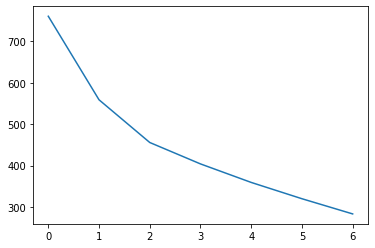

In [97]:
# metoda łokcia - elbow-curve
ssd = [] # Sum of squared distances
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    ssd.append(kmeans.inertia_) #Sum of squared distances
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [98]:
# Miara wewnętrzna - wskaźnik sylwetkowy
# średnią odległość pomiędzy obserwacjami wewnątrz grupy (a) i średnią odległość obserwacji do najbliższej „obcej” grupy (b). 
# Silhouette obliczany jest dla każdej obserwacji w następujący sposób: (a – b)/max(a, b)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.3185783255391956
For n_clusters=3, the silhouette score is 0.32141599775340335
For n_clusters=4, the silhouette score is 0.307318314033466
For n_clusters=5, the silhouette score is 0.29870075124497764
For n_clusters=6, the silhouette score is 0.30772683635772596
For n_clusters=7, the silhouette score is 0.3074639359772094
For n_clusters=8, the silhouette score is 0.29016139343444525


In [99]:
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [100]:
kmeans.labels_

array([1, 3, 0, 1, 3, 0, 0, 2, 2, 0, 2, 2, 0, 3, 3, 2, 3, 1, 3, 0, 3, 1,
       0, 3, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 0, 1, 1, 1, 3, 1, 3, 2, 3, 2,
       0, 0, 0, 3, 1, 1, 3, 3, 2, 2, 0, 1, 3, 2, 1, 2, 3, 0, 1, 1, 3, 3,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 3, 0, 1, 1, 3, 1, 3, 3, 1, 1, 0, 3,
       3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 2, 2, 0, 1, 3,
       3, 0, 0, 3, 2, 0, 0, 1, 3, 0, 1, 3, 3, 3, 2, 3, 1, 2, 2, 0, 3, 1,
       3, 2, 1, 1, 3, 1, 1, 3, 3, 0, 3, 1, 3, 2, 2, 0, 0, 3, 3, 1, 1])

In [101]:
country_data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

C:\Users\halupkam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


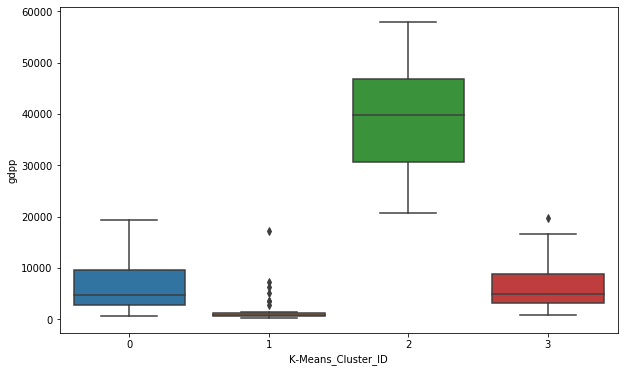

In [106]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

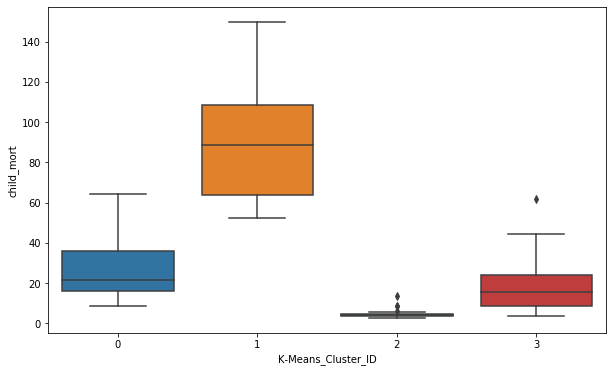

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

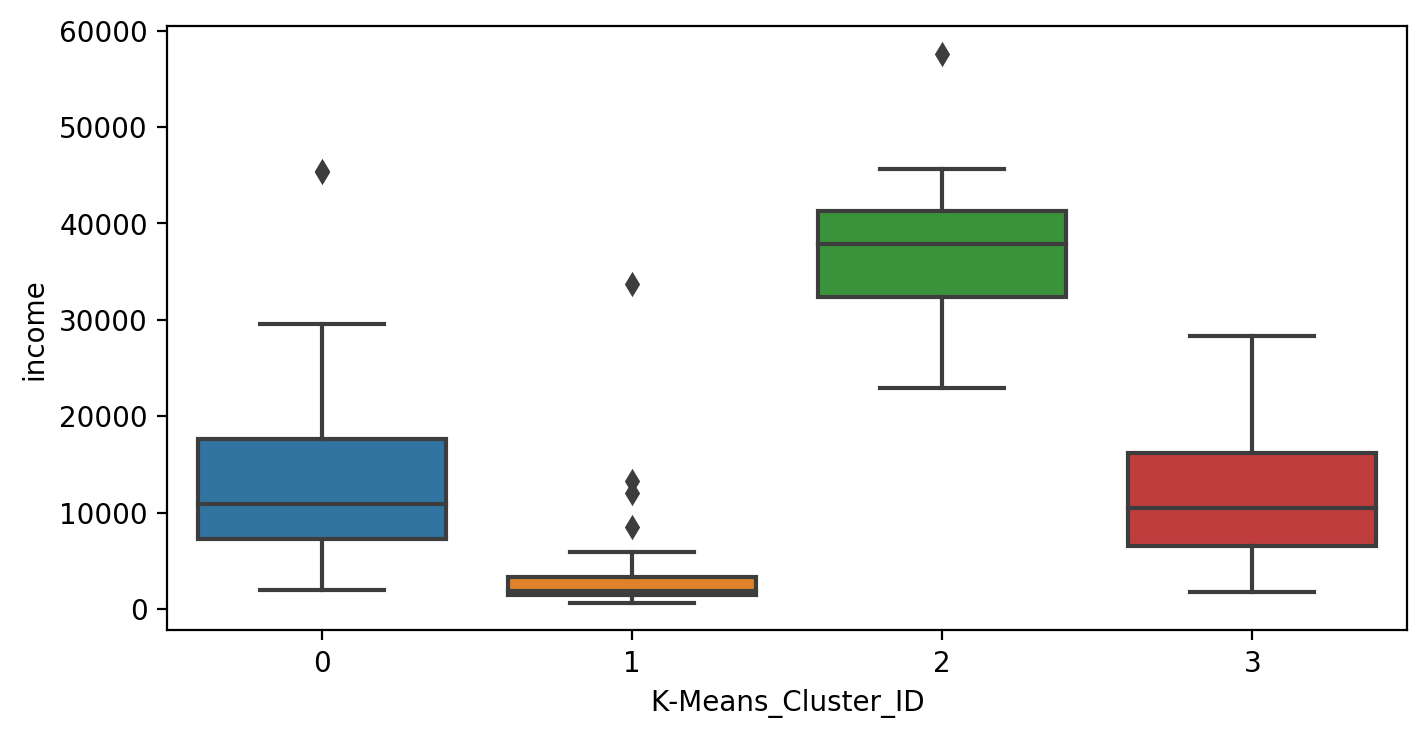

In [109]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

In [111]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


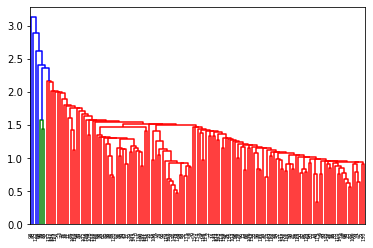

In [112]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

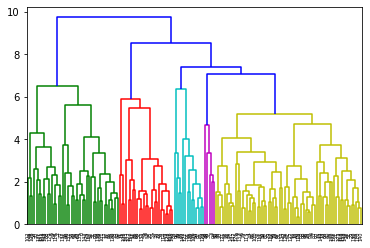

In [113]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [114]:
# 4 klastry z single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [115]:
# 4 klastry z complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [116]:
country_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

C:\Users\halupkam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [117]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1


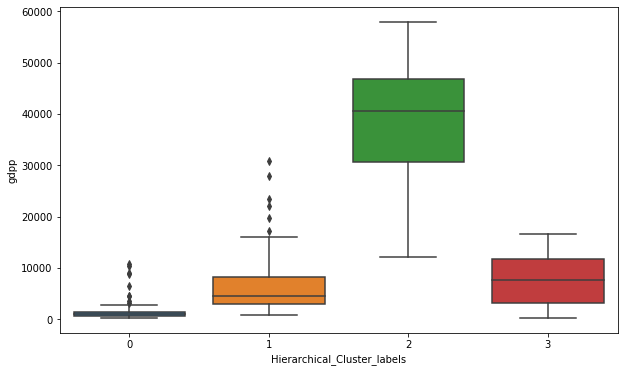

In [119]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

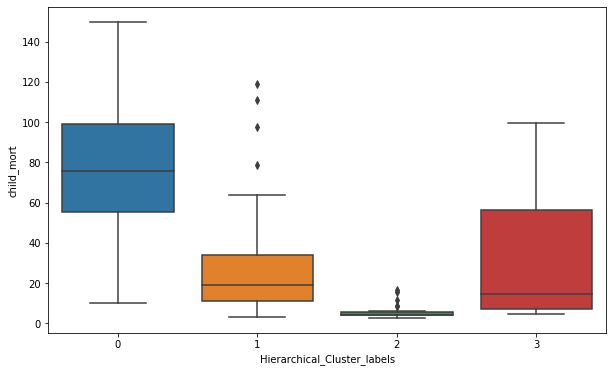

In [120]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [121]:
country_data_outliers_removed

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,0


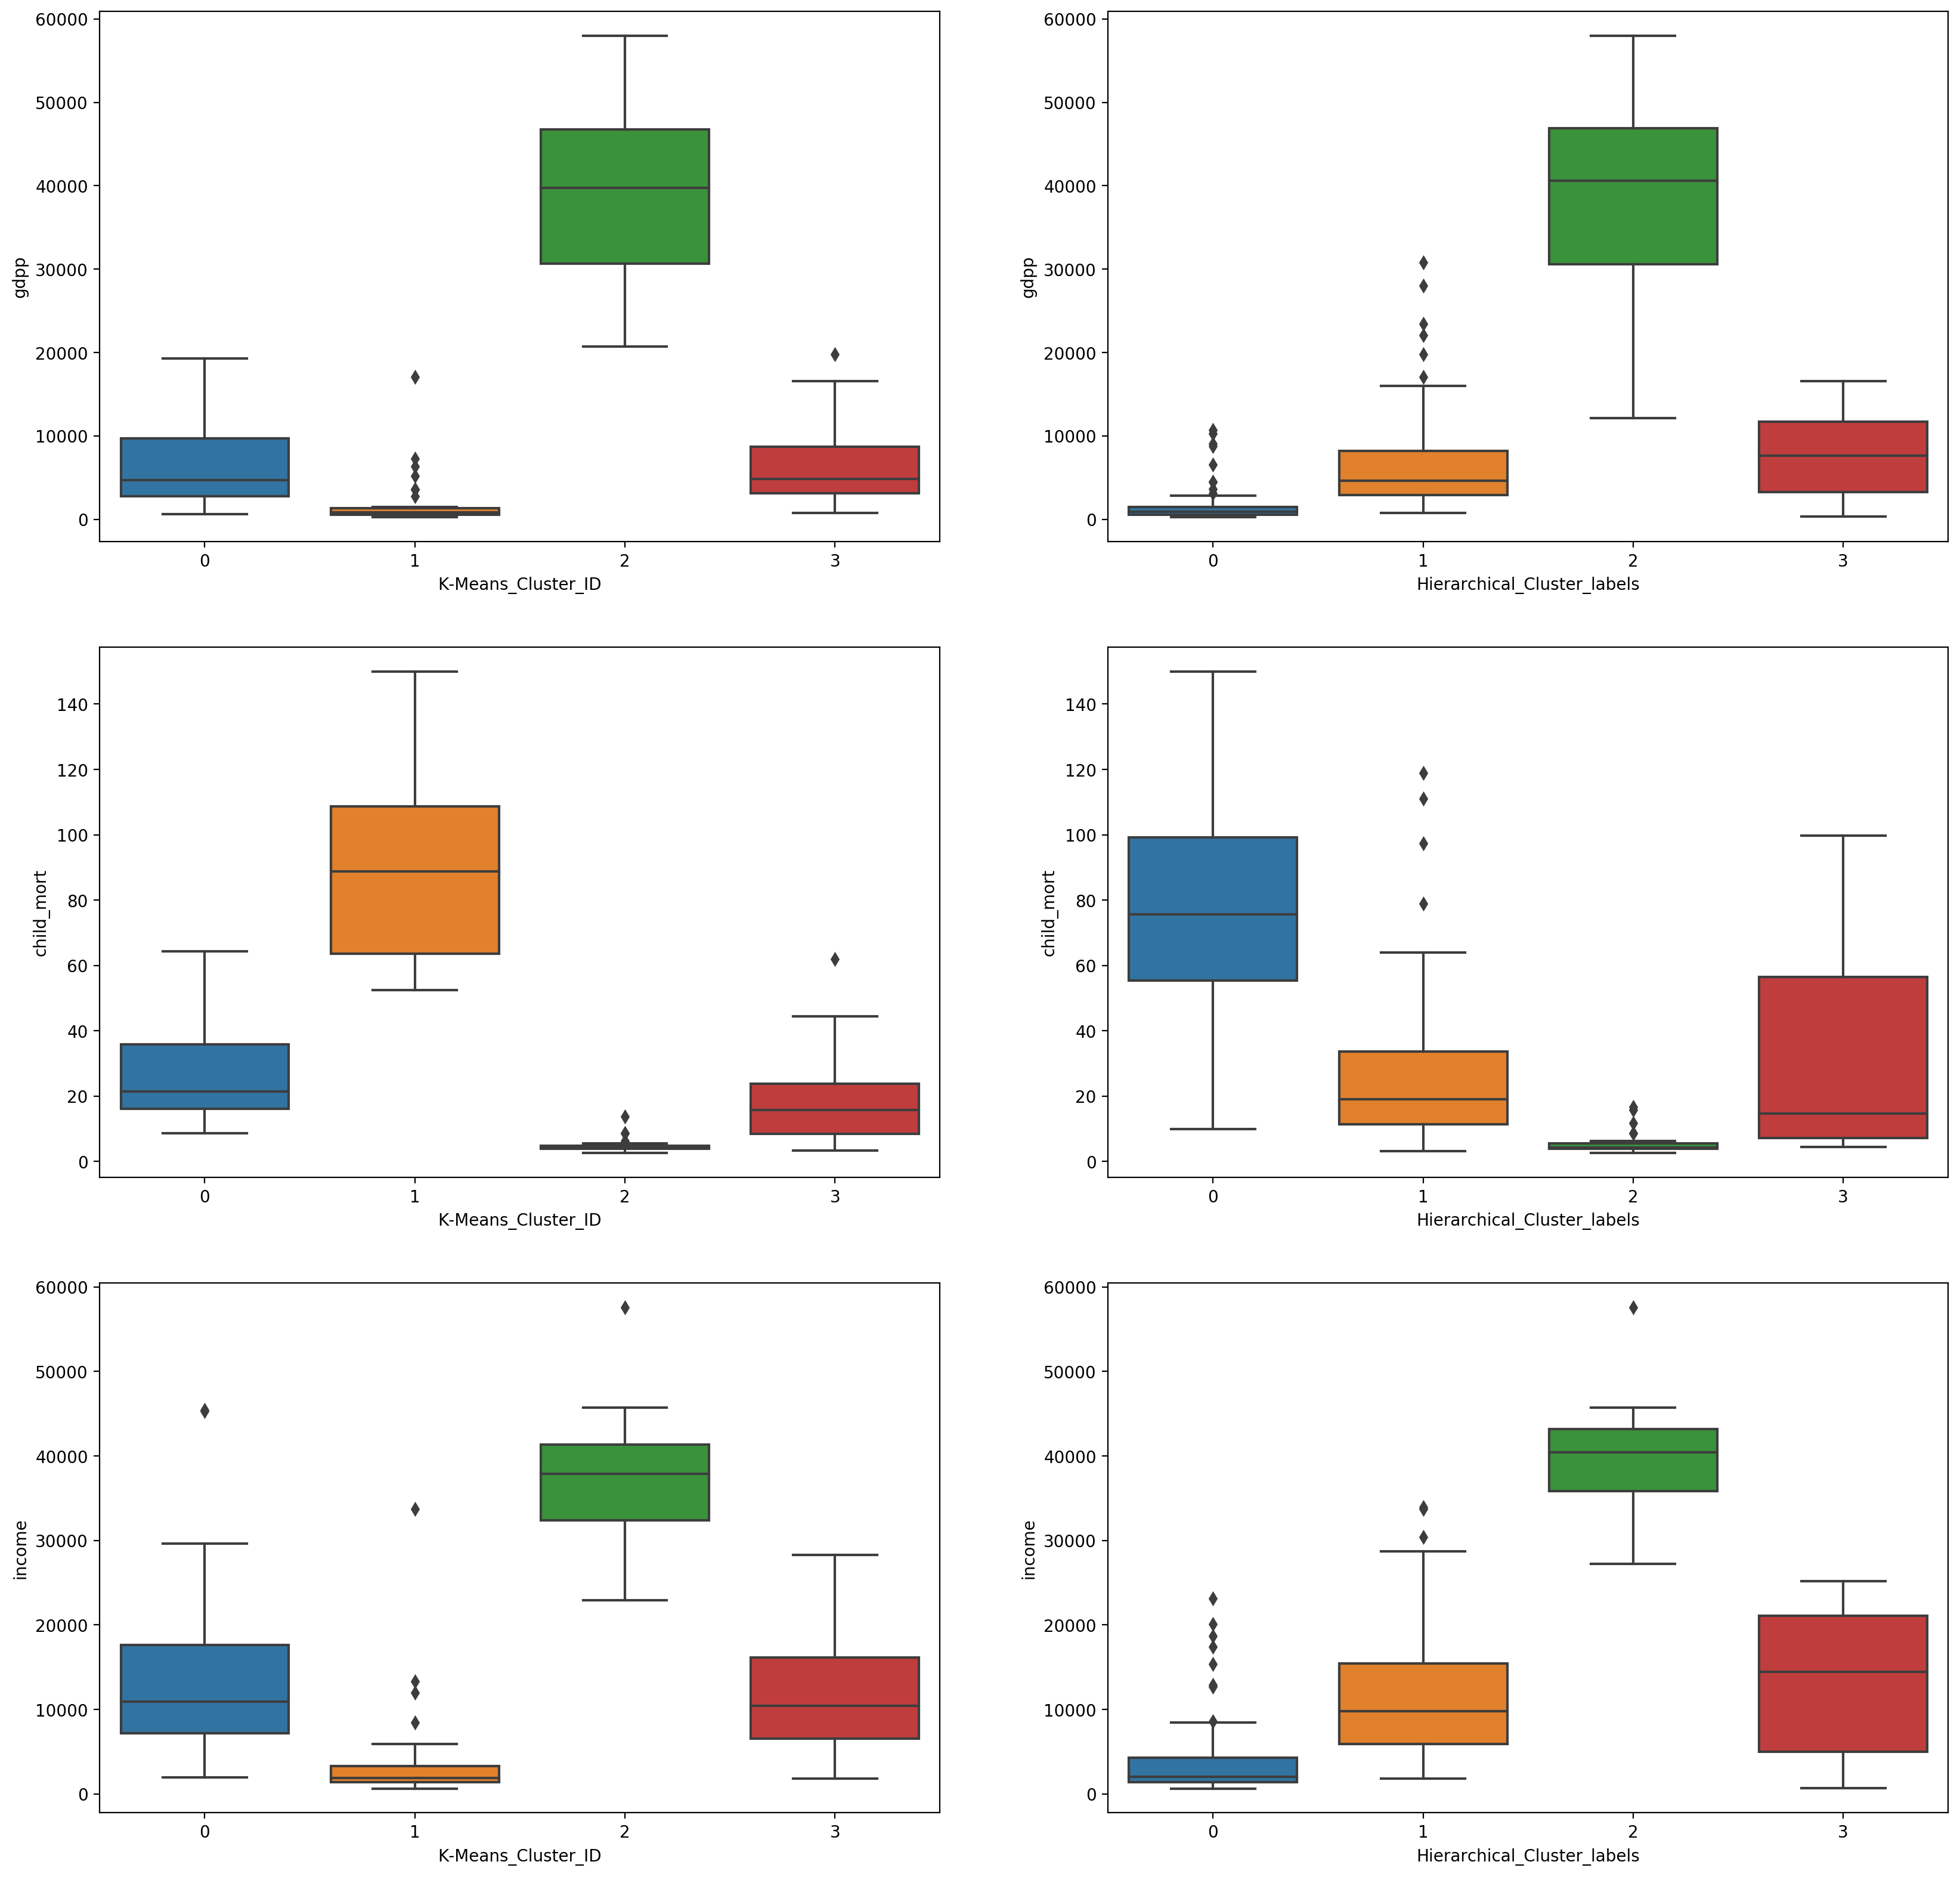

In [122]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [123]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3','PC4'])

In [124]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4
0,-3.129112,-0.530438,1.326366,0.592673
1,0.552498,-0.242770,-0.157737,-1.362826
2,-0.357008,-0.461483,-1.876976,-0.109599
3,-3.456355,1.213750,-1.381585,2.217845
4,1.308078,0.615244,-0.031004,-0.713291


In [125]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [126]:
X_pca_final_df.head()

,PC1,PC2,PC3,PC4,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.129112,-0.530438,1.326366,0.592673,1,0
1,0.552498,-0.242770,-0.157737,-1.362826,3,1
2,-0.357008,-0.461483,-1.876976,-0.109599,0,0
3,-3.456355,1.213750,-1.381585,2.217845,1,1
4,1.308078,0.615244,-0.031004,-0.713291,3,1


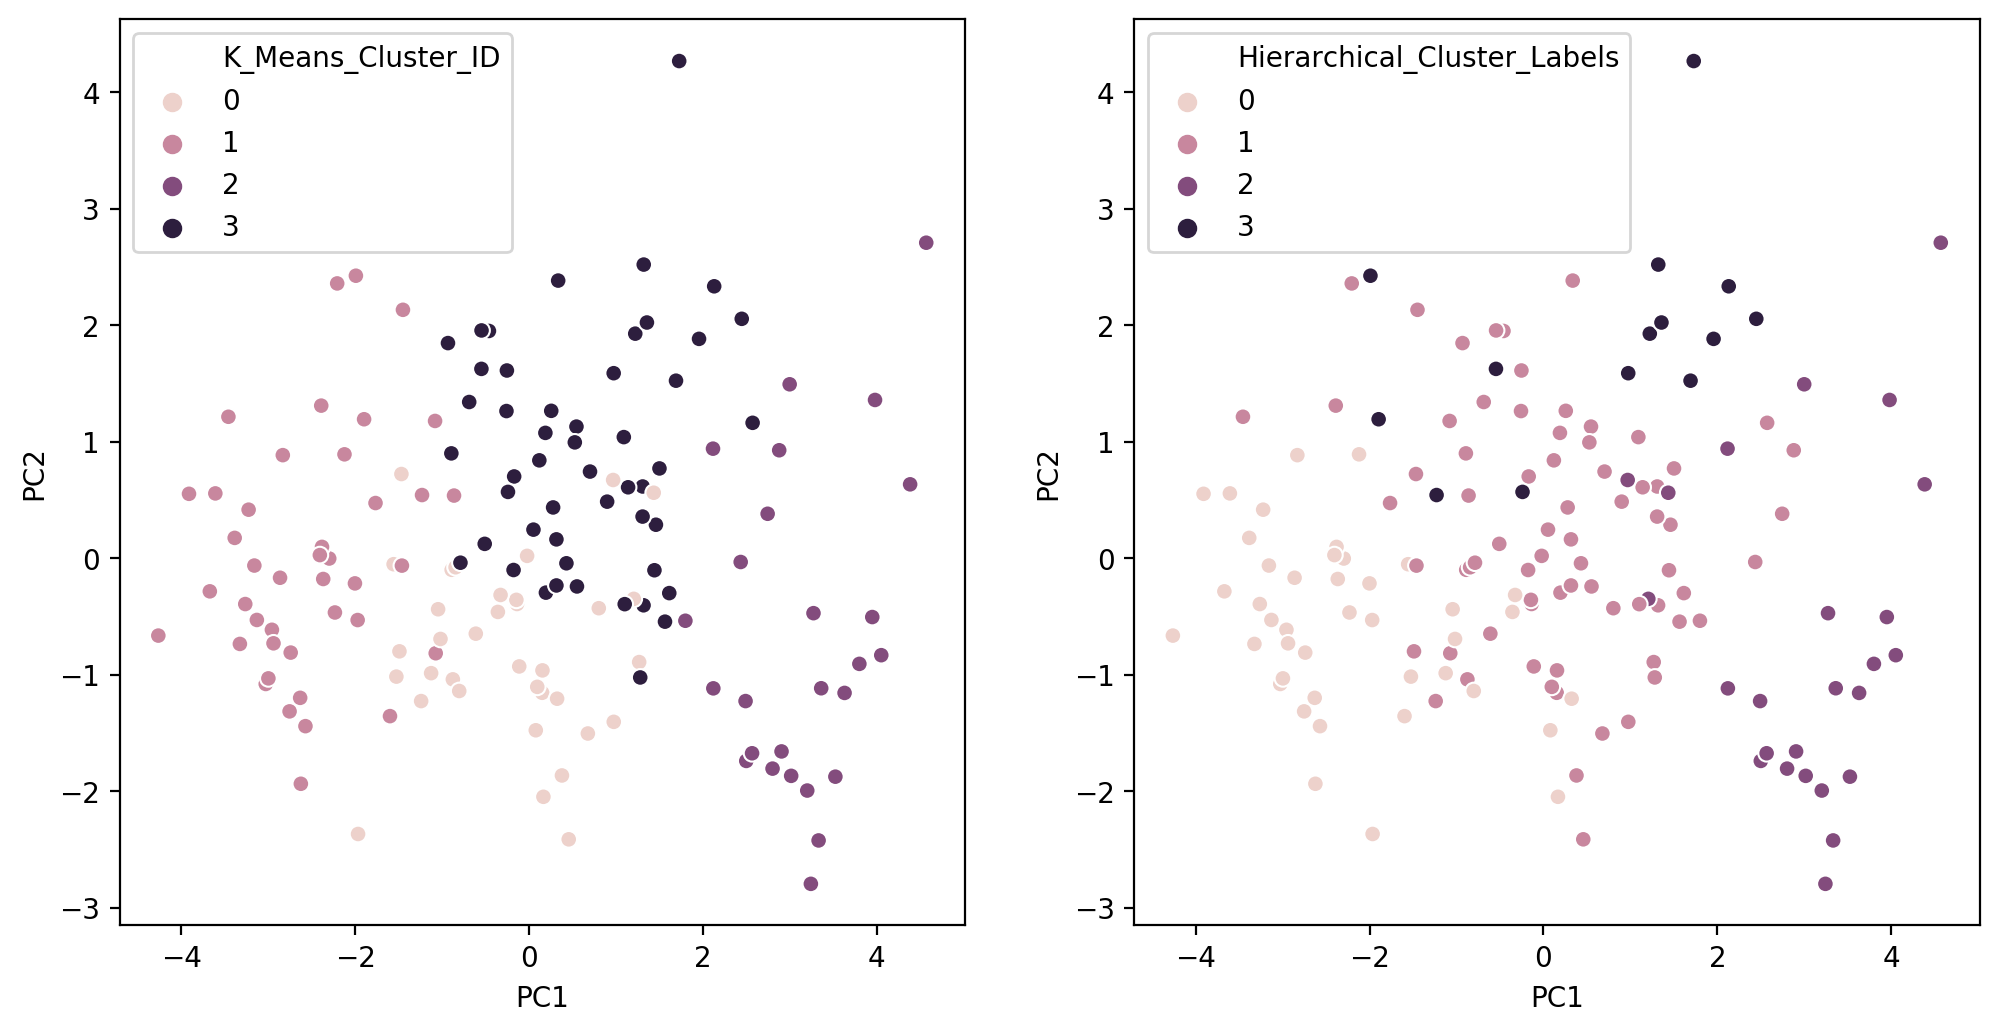

In [127]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

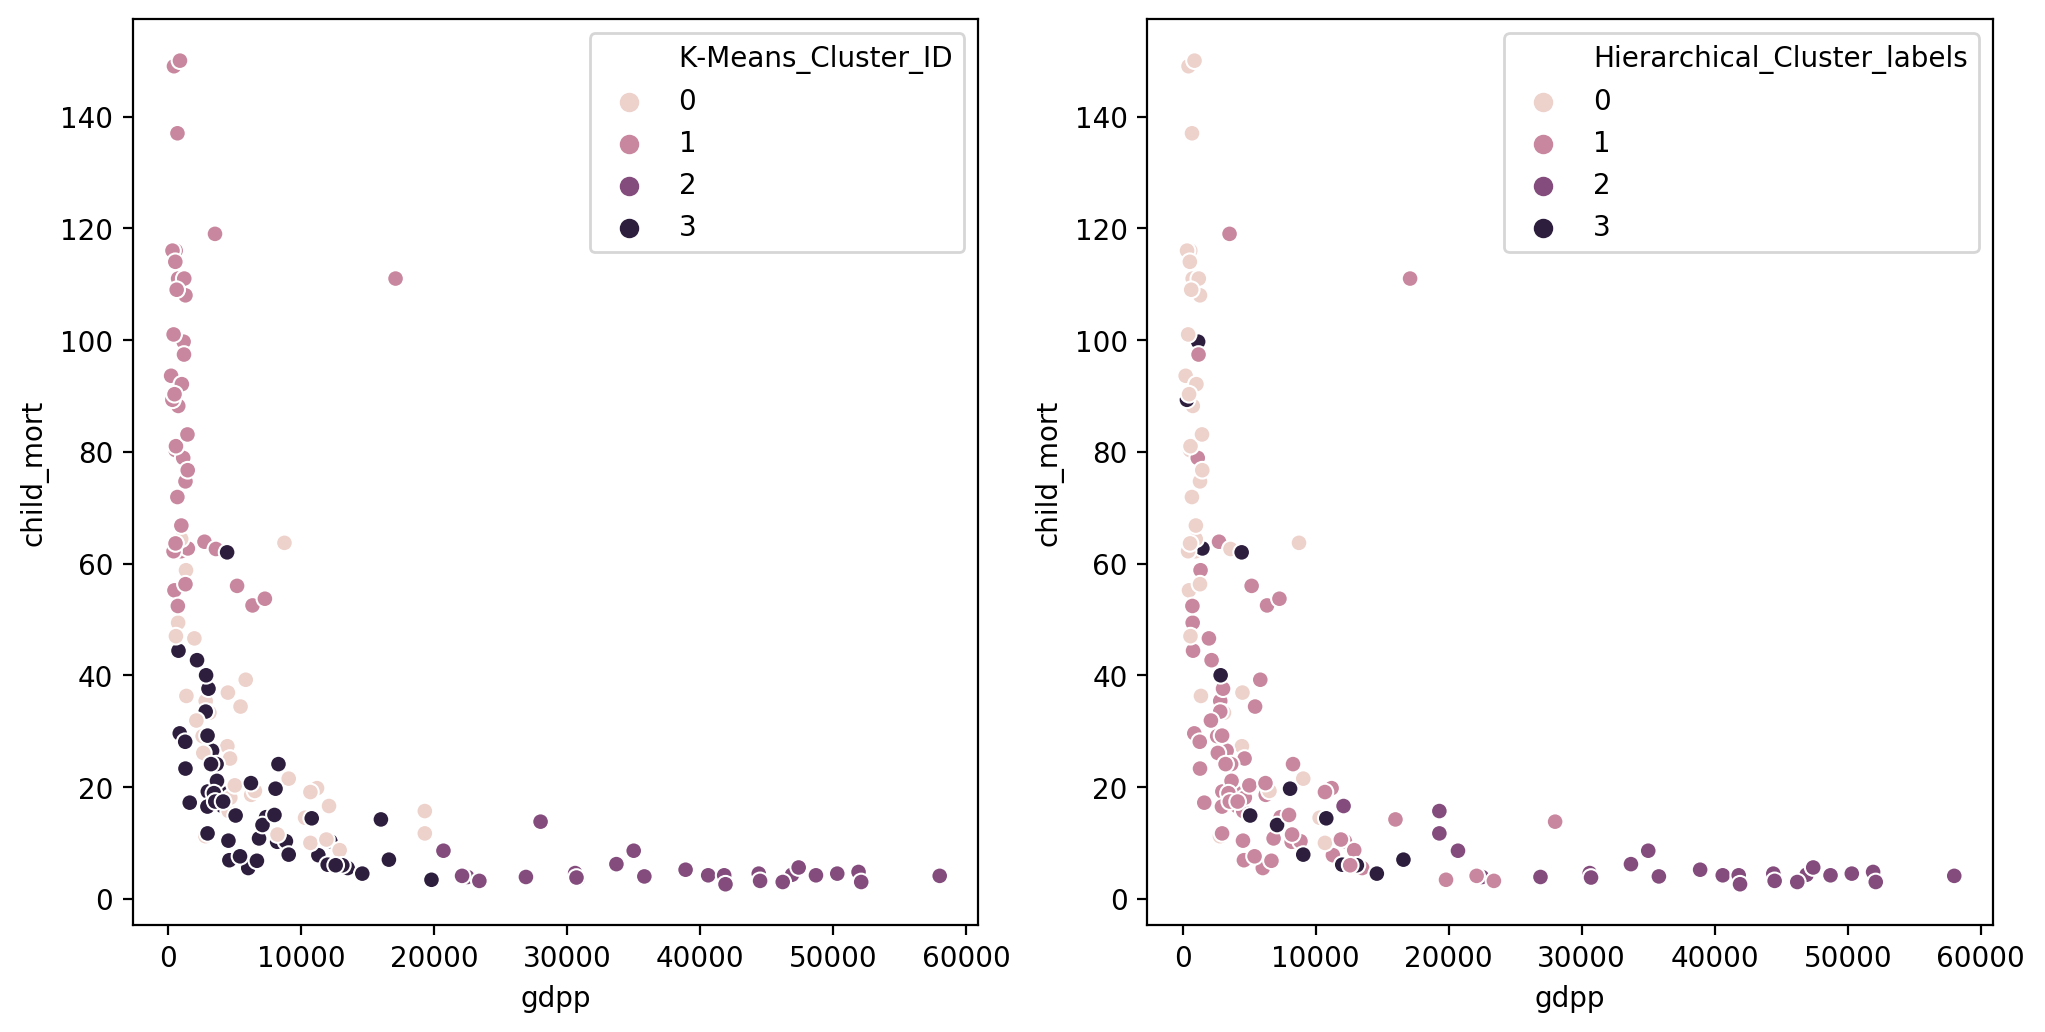

In [128]:
# scatter plot using the gdpp, child_mort to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

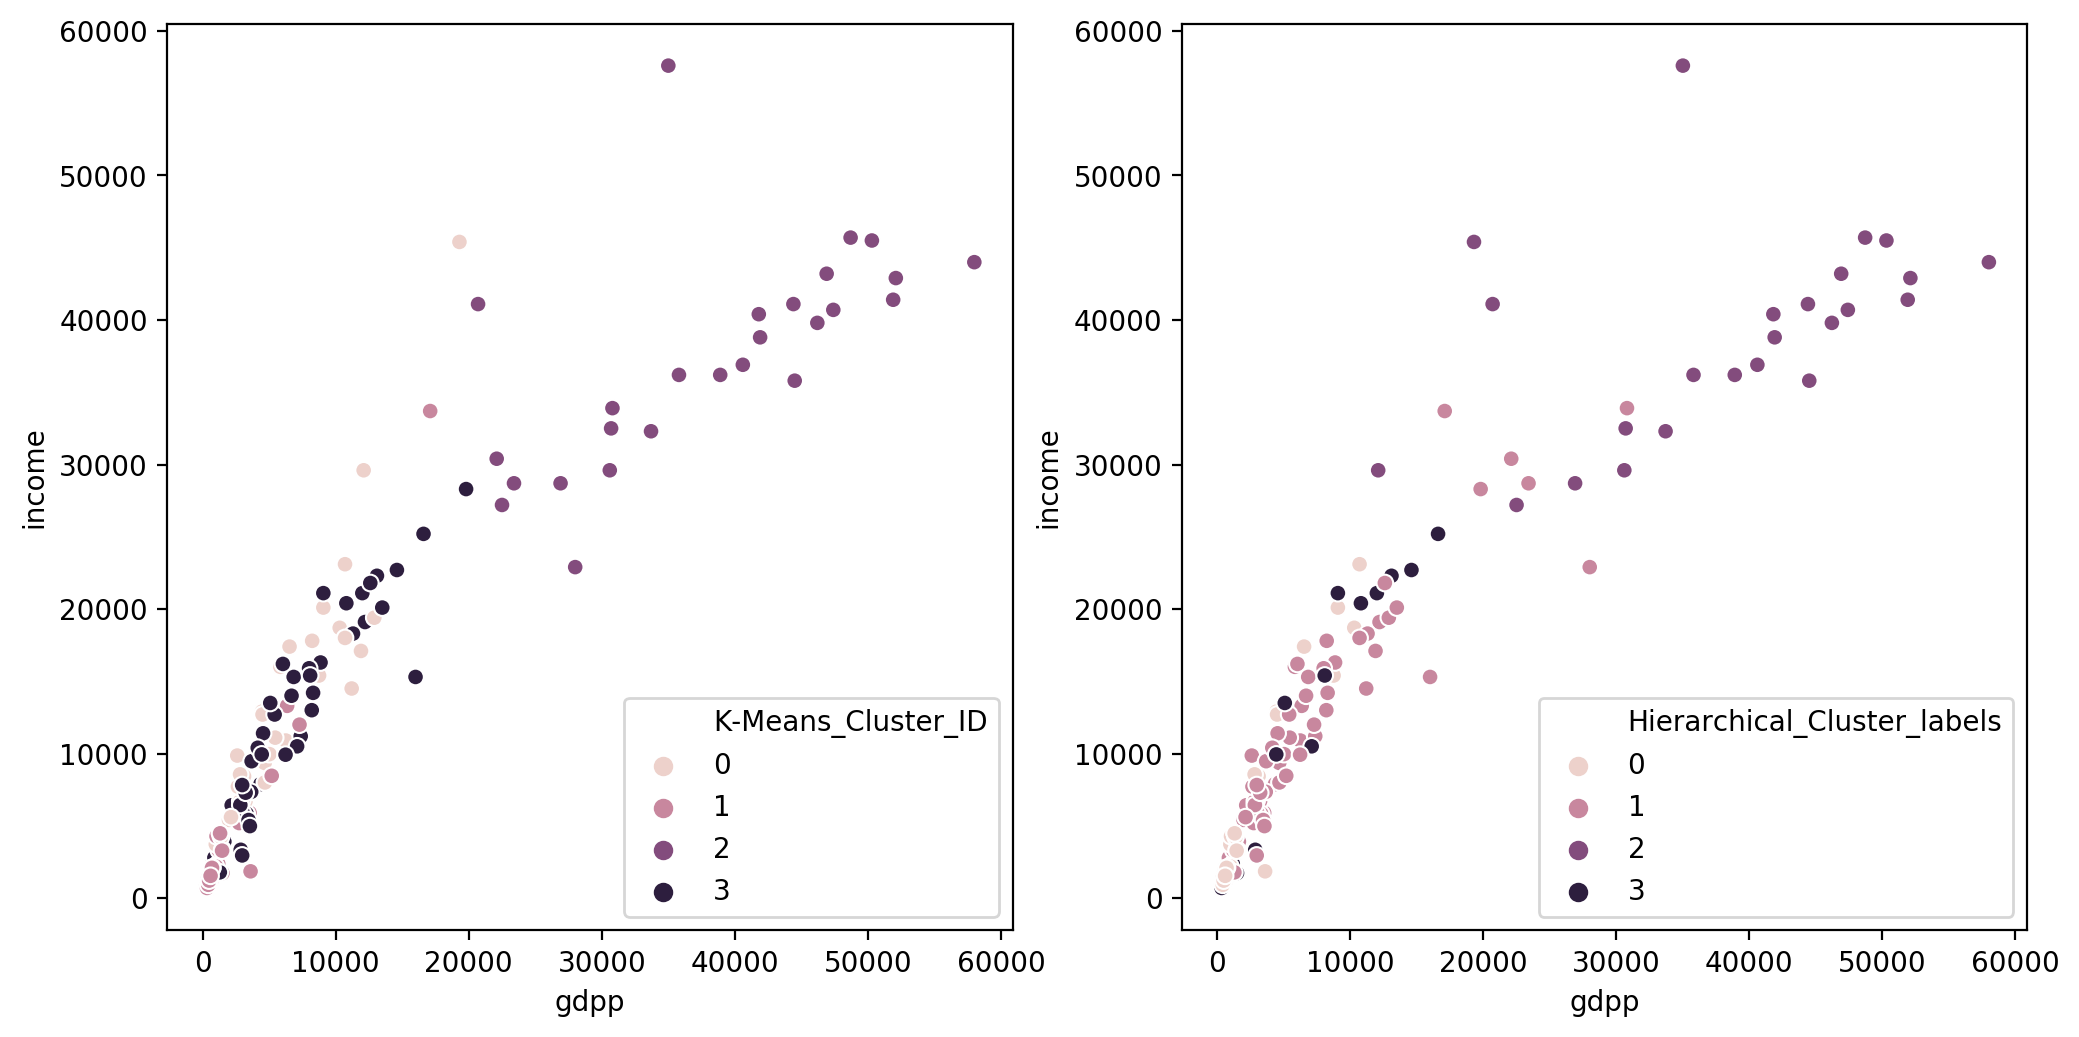

In [129]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

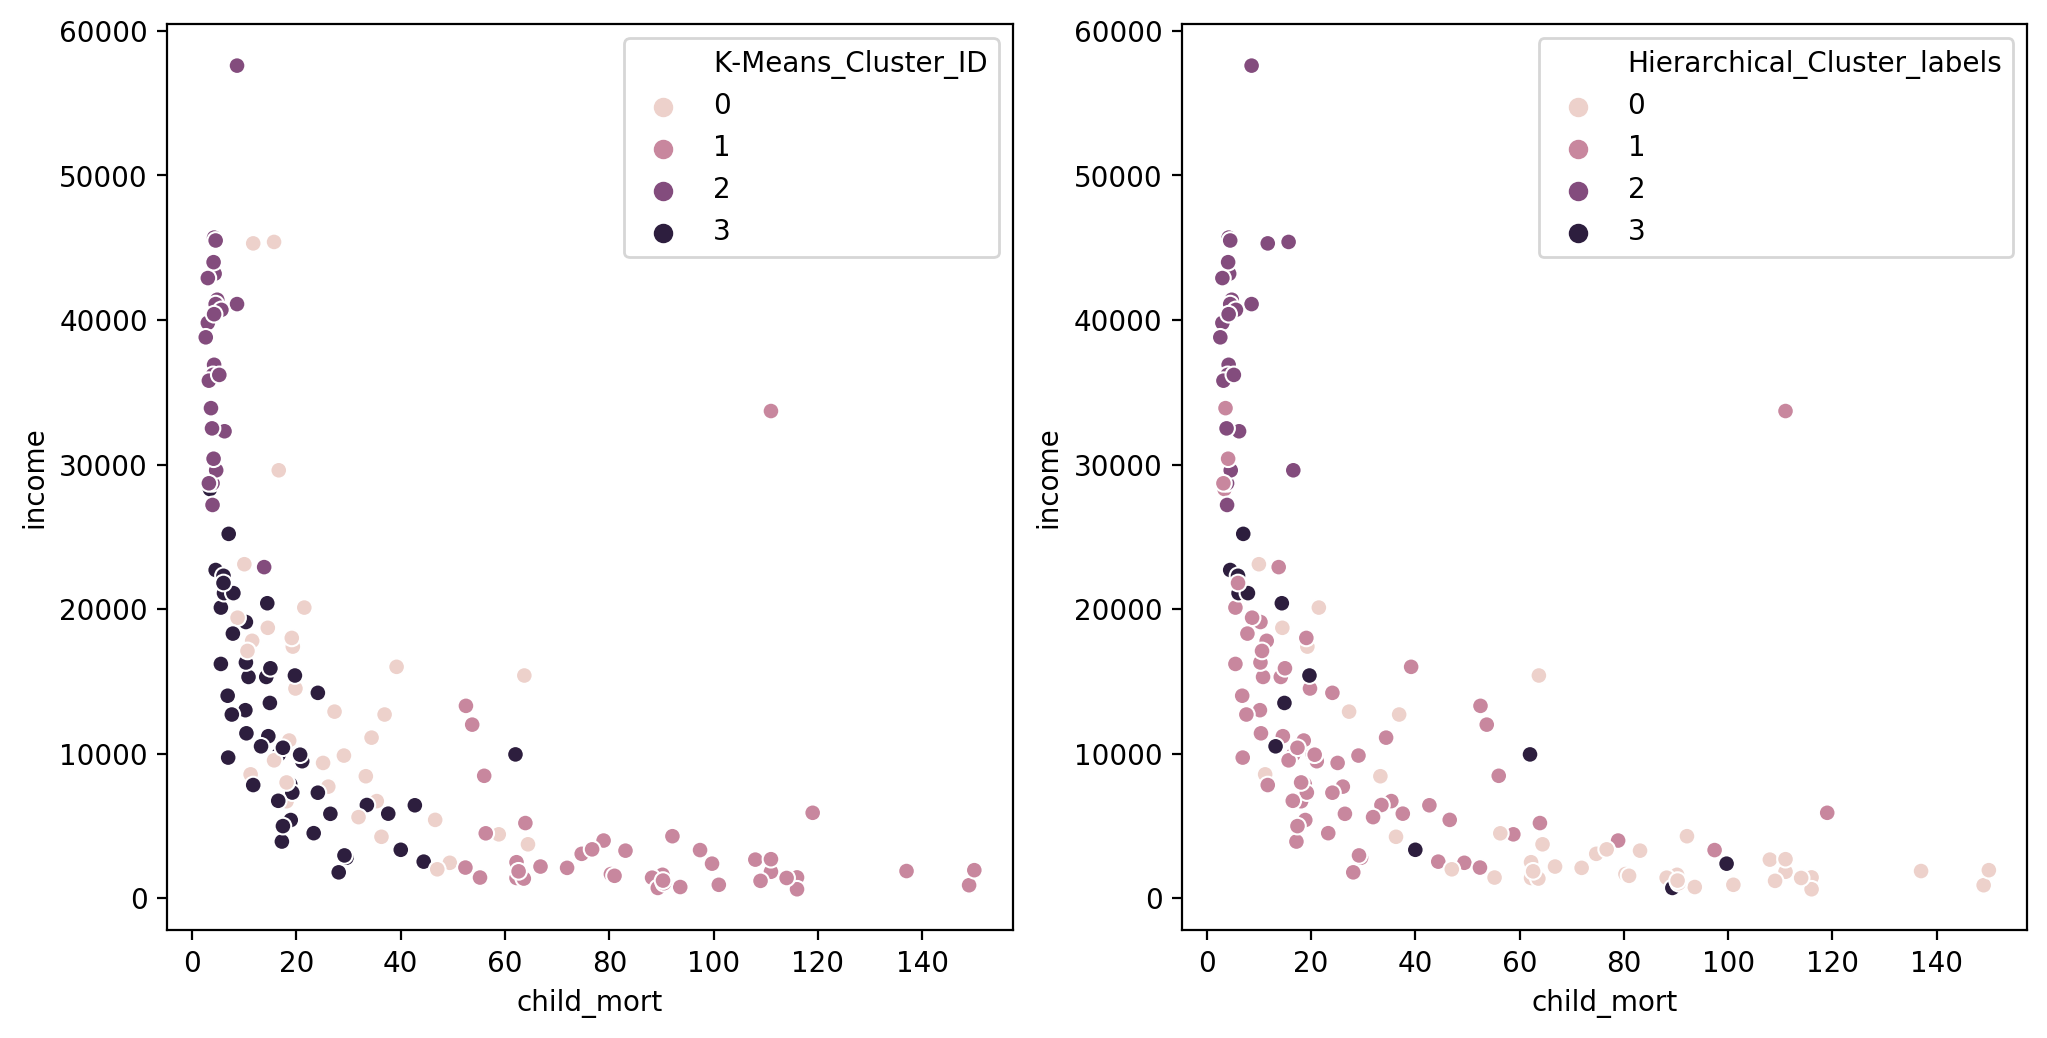

In [130]:
plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

In [135]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 3]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,3,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,3,1
14,Belarus,5.5,51.4,5.61,64.5,16200,15.100,70.4,1.49,6030,3,1
16,Belize,18.8,58.2,5.20,57.5,7880,1.140,71.4,2.71,4340,3,1
18,Bhutan,42.7,42.5,5.20,70.7,6420,5.990,72.1,2.38,2180,3,1
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,3,1
24,Bulgaria,10.8,50.2,6.87,53.0,15300,1.110,73.9,1.57,6840,3,1
27,Cambodia,44.4,54.1,5.68,59.5,2520,3.120,66.1,2.88,786,3,1
30,Cape Verde,26.5,32.7,4.09,61.8,5830,0.505,72.5,2.67,3310,3,1


In [132]:
Hirarchical_countries = country_data_outliers_removed[country_data_outliers_removed['Hierarchical_Cluster_labels'] == 0]
Hirarchical_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,1,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,0,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,0,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,1,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,1,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,1,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,1,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,1,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,1,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,1,0


In [136]:
len(Hirarchical_countries)

42

In [137]:
len(K_Means_countries)

50

In [ ]:
common_countries = pd.merge(K_Means_countries,Hirarchical_countries,how='inner',on=['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K-Means_Cluster_ID',
       'Hierarchical_Cluster_labels'])

In [ ]:
common_countries.columns

In [ ]:
common_countries[['country', 'child_mort', 'income','gdpp']]

In [ ]:
len(common_countries)

In [138]:
# Load libraries
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [139]:
# Load data
iris = datasets.load_iris()
X = iris.data

In [140]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [141]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [142]:
clt = DBSCAN(eps=0.5, metric='euclidean', min_samples=5, n_jobs=-1)
model = clt.fit(X_std)

In [143]:
clt.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

In [144]:
X_std.shape

(150, 4)

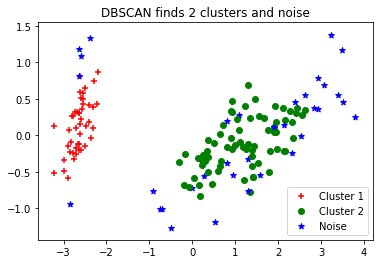

In [145]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if clt.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    elif clt.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')
    elif clt.labels_[i] == -1:
            c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

## Simple dataset, comparison of clustering approaches

In [28]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

In [29]:
np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [30]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df.append(PointsInCircum(300,700))
df=df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

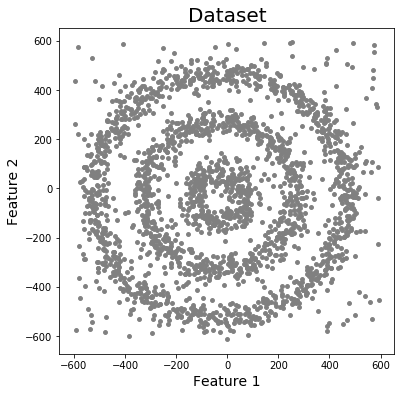

In [31]:
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## KMeans

In [38]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

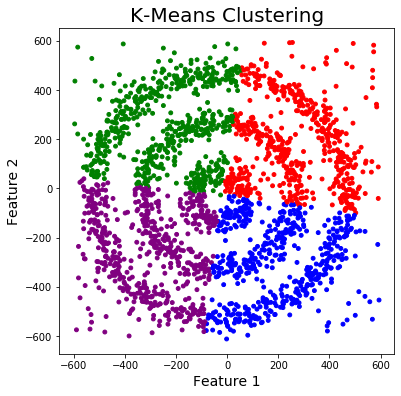

In [39]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Hierarchical clustering

In [44]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

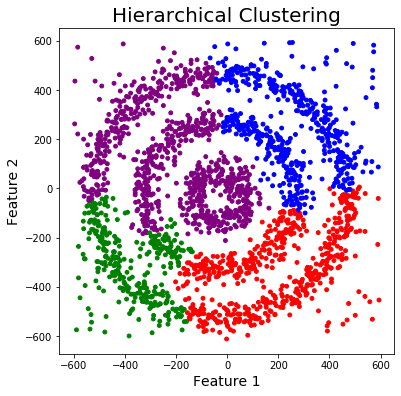

In [45]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## DBSCAN

In [46]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

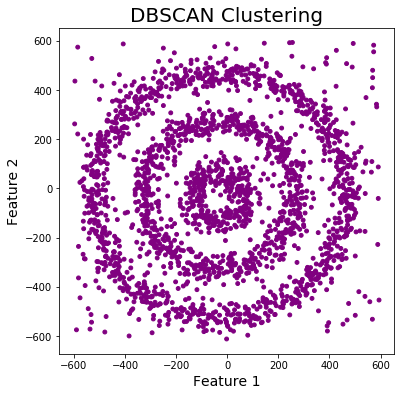

In [47]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [48]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

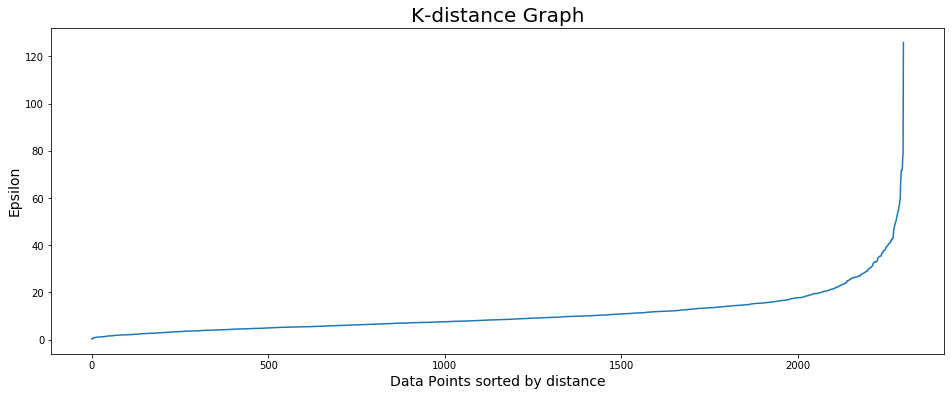

In [49]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(16,6))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [50]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(algorithm='auto', eps=30, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [51]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    1030
 1     730
 2     318
-1     222
Name: DBSCAN_opt_labels, dtype: int64

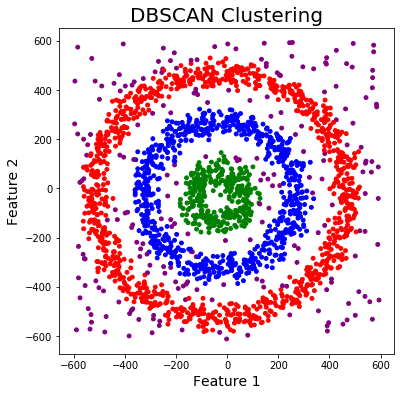

In [52]:
# Plotting the resulting clusters
plt.figure(figsize=(6,6))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Dimensionality reduction, MNIST

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

In [2]:
x = mnist.data
y = mnist.target

In [3]:
y = y.astype(int)

In [4]:
x.shape

(70000, 784)

In [7]:
import matplotlib.pyplot as plt
import numpy as np

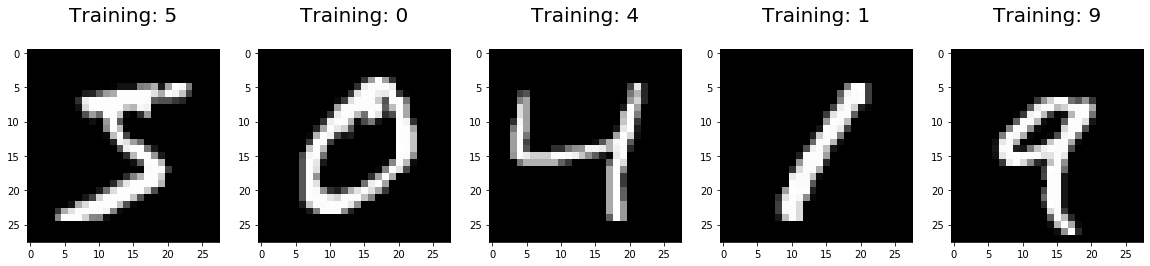

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:5], y[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %s\n' % label, fontsize = 20)

In [10]:
## Standardizing the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(x)
print(standardized_data.shape)

(70000, 784)


In [15]:
## Importing and Apply PCA
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principal_df.shape

(70000, 2)

In [16]:
principal_df.head()

,principal component 1,principal component 2
0,122.252796,-316.183385
1,1010.494596,-289.998527
2,-59.000681,393.759036
3,-796.959814,-607.490921
4,-391.318835,729.768461


In [17]:
# Explaining the Variance ratio
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445]


Text(0, 0.5, 'Principal Component 2')

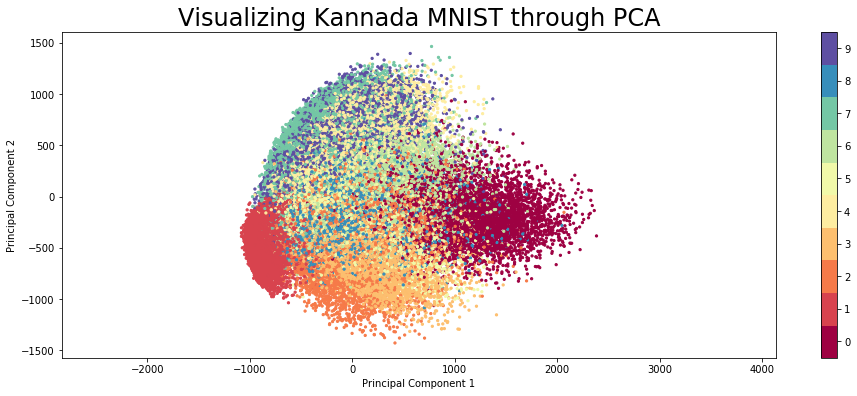

In [19]:
# Plot the first two principal components of each point to learn about the data:
plt.figure(figsize=(16,6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

In [20]:
## Using 3 Principal Components

pca = PCA(n_components=3) # project from 784 to 2 dimensions
principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principal_df.shape

(70000, 3)

In [21]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


In [22]:
from sklearn.manifold import TSNE

In [23]:
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 

x_subset = x[0:10000]
y_subset = y[0:10000]

print(np.unique(y_subset))


[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#tsne = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=300).fit_transform(x_subset)

In [24]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

In [25]:
pca_tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(pca_result_50)

Text(0.5, 1.0, 'Visualizing Kannada MNIST through t-SNE')

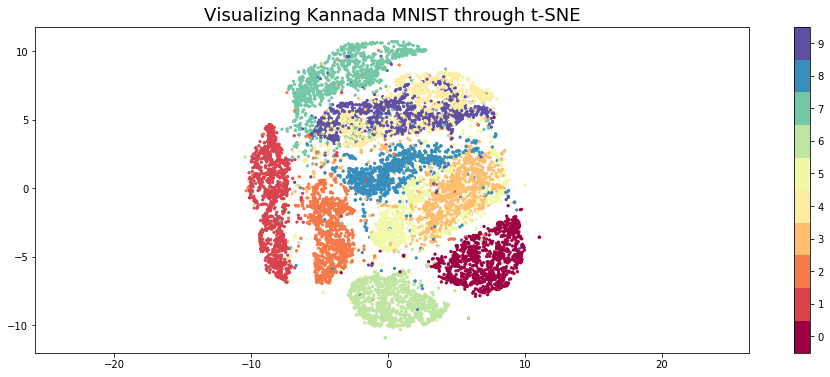

In [26]:
plt.figure(figsize=(16,6))
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], s= 5, c=y_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing Kannada MNIST through t-SNE', fontsize=18)